In [1]:
import MySQLdb
import pandas

def connect():
   user = "root"
   password = ""
   host = "localhost"
   db = "lp_vs_gerrit_metrics"
   port=3306
   use_unicode=True

   try:
      db = MySQLdb.connect(user = user, passwd = password, db = db, port = port, use_unicode = use_unicode)
      return db, db.cursor()
   except:
      logging.error("Database connection error!")
      raise
        
def execute_query(connector, query):
   results = int (connector.execute(query))
   cont = 0
   if results > 0:
      result1 = connector.fetchall()
      return result1
   else:
      return []
    
db, cursor = connect()

The following query provides and puts all together the information for the tickets from launchpad (LP): issue id, opening date, fix commited date, closing date. Storing in a view for facilitating future references.

In [6]:
cursor.execute(""" create view tickets_LP as
select iel.issue_id as issue_ID_LP, i.issue as issue_LP, iel.date_created, iel.date_fix_committed, iel.date_closed 
from issues_ext_launchpad iel
inner join issuesLP i
on iel.issue_id=i.id """)

0L

In [15]:
cursor.execute(""" select * from tickets_LP
limit 50 """)

50L

In [17]:
cursor.fetchall()

((1L,
  u'1476582',
  datetime.datetime(2015, 7, 21, 9, 41, 27),
  None,
  datetime.datetime(2015, 7, 22, 8, 29, 31)),
 (2L, u'1456378', datetime.datetime(2015, 5, 18, 22, 57, 30), None, None),
 (3L, u'1480561', datetime.datetime(2015, 8, 1, 14, 36, 1), None, None),
 (4L, u'1481552', datetime.datetime(2015, 8, 5, 2, 8, 5), None, None),
 (5L, u'1481553', datetime.datetime(2015, 8, 5, 2, 8, 5), None, None),
 (6L, u'1482004', datetime.datetime(2015, 8, 6, 1, 50, 44), None, None),
 (7L,
  u'1189323',
  datetime.datetime(2013, 6, 10, 4, 8, 18),
  None,
  datetime.datetime(2013, 6, 21, 18, 34, 41)),
 (8L,
  u'1188660',
  datetime.datetime(2013, 6, 7, 15, 31, 21),
  datetime.datetime(2013, 6, 24, 4, 28, 30),
  datetime.datetime(2013, 6, 24, 4, 28, 30)),
 (9L,
  u'1200659',
  datetime.datetime(2013, 7, 12, 14, 42, 51),
  None,
  datetime.datetime(2013, 8, 12, 16, 32, 31)),
 (10L,
  u'1209266',
  datetime.datetime(2013, 8, 7, 14, 41, 34),
  None,
  datetime.datetime(2013, 9, 4, 22, 41, 28)),
 (

The following query provides the datas about the reviews in the Gerrit code review (CR) that can provide the link to the bugs on the LP platform, as: database issue id, issue id in Gerrit, the Gerrit url, the project to which they are related and the related_artifacts which contains the info for linking the review with the related bug in LP

In [9]:
cursor.execute(""" create view review_bugs_CR as
select ieg.issue_id, icr.issue, ieg.url, icr.status, icr.tracker_id, ieg.related_artifacts
from issues_ext_gerrit ieg
inner join issuesCR icr
on ieg.issue_id=icr.id """)

0L

In [10]:
cursor.execute(""" select * from review_bugs_CR
limit 50 """)

50L

In [11]:
cursor.fetchall()

((1L,
  u'148509',
  u'https://review.openstack.org/148509',
  u'MERGED',
  1L,
  u'bp/consolidate-console-api'),
 (2L,
  u'170089',
  u'https://review.openstack.org/170089',
  u'MERGED',
  1L,
  u'bug/1383345'),
 (3L,
  u'175780',
  u'https://review.openstack.org/175780',
  u'NEW',
  1L,
  u'bug/1298242'),
 (4L,
  u'165060',
  u'https://review.openstack.org/165060',
  u'MERGED',
  1L,
  u'bp/vmware-better-display-names'),
 (5L,
  u'174064',
  u'https://review.openstack.org/174064',
  u'MERGED',
  1L,
  u'173665'),
 (6L,
  u'175786',
  u'https://review.openstack.org/175786',
  u'MERGED',
  1L,
  u'bug/1444021'),
 (7L,
  u'173304',
  u'https://review.openstack.org/173304',
  u'NEW',
  1L,
  u'bp/cache-aware-weigher'),
 (8L,
  u'175789',
  u'https://review.openstack.org/175789',
  u'MERGED',
  1L,
  u'bug/1444021'),
 (9L,
  u'174605',
  u'https://review.openstack.org/174605',
  u'MERGED',
  1L,
  u'bug/1444728-kilo'),
 (10L, u'174477', u'https://review.openstack.org/174477', u'MERGED', 1

The following query provides the identification between the LP and the CR for the bugs. Stored on a virtual table for complexity facility. 

In [12]:
cursor.execute(""" create view LP_bugs_CR as
select t.issue_LP, r.issue as issue_CR, r.related_artifacts, r.tracker_id, r.status
from tickets_LP t
inner join review_bugs_CR r
on locate(t.issue_LP, r.related_artifacts) """)

0L

In [13]:
cursor.execute(""" select * from LP_bugs_CR
limit 50 """)

50L

In [14]:
cursor.fetchall()

((u'1367189', u'155730', u'bug/1367189', 1L, u'MERGED'),
 (u'1348818', u'174356', u'bug/1348818', 1L, u'MERGED'),
 (u'1348818', u'174356', u'bug/1348818', 1L, u'MERGED'),
 (u'1348818', u'174356', u'bug/1348818', 1L, u'MERGED'),
 (u'1384379', u'160266', u'bug/1384379', 1L, u'ABANDONED'),
 (u'1384379', u'160266', u'bug/1384379', 1L, u'ABANDONED'),
 (u'1348818', u'163877', u'bug/1348818', 1L, u'MERGED'),
 (u'1348818', u'163877', u'bug/1348818', 1L, u'MERGED'),
 (u'1348818', u'163877', u'bug/1348818', 1L, u'MERGED'),
 (u'1437904', u'163328', u'bug/1437904', 1L, u'MERGED'),
 (u'1348818', u'163364', u'bug/1348818', 1L, u'MERGED'),
 (u'1348818', u'163364', u'bug/1348818', 1L, u'MERGED'),
 (u'1348818', u'163364', u'bug/1348818', 1L, u'MERGED'),
 (u'1348818', u'163361', u'bug/1348818', 1L, u'MERGED'),
 (u'1348818', u'163361', u'bug/1348818', 1L, u'MERGED'),
 (u'1348818', u'163361', u'bug/1348818', 1L, u'MERGED'),
 (u'1377161', u'166695', u'bug/1377161', 1L, u'ABANDONED'),
 (u'1348818', u'163359

The next query focuses on collecting data for measuring the time to close the reviews in Gerrit.

In [16]:
query = """ select i.issue                       as gerrit_issue,  
                   t0.opening_date               as gerrit_opening_date,  
                   t1.closing_date               as gerrit_closing_date, 
                   timestampdiff(SECOND, t0.opening_date, t1.closing_date) as time2close, 
                   t.url                         as gerrit_tracker,
                   i.status                      as current_status 
            from issuesCR i, 
                 trackers t, 
                 changes ch, 
                 (select i.id as issue_id, 
                         ch.changed_on as closing_date 
                  from issuesCR i 
                    left join changes ch 
                    on ch.issue_id = i.id and 
                       field='status' and 
                       (new_value='ABANDONED' or new_value='MERGED') ) t1, 
                 (select ch.issue_id, 
                         ch.changed_on as opening_date 
                  from changes ch 
                  where ch.field='status' and 
                        ch.new_value='UPLOADED' and 
                        ch.old_value=1) t0 
            where i.tracker_id=t.id and 
                  ch.issue_id = i.id and 
                  i.id=t0.issue_id  and 
                  i.id=t1.issue_id 
            group by i.issue """

In [17]:
data = execute_query(cursor, query)

# Importing datas from mysql to pandas

In [18]:
data_list = list(data)

In [19]:
pandas_ds = pandas.DataFrame(data_list, columns=["gerrit_issue", "gerrit_opening_date", "gerrit_closing_date", "time2close", "gerrit_tracker", "current_status"])
pandas_ds.columns.values.tolist()

['gerrit_issue',
 'gerrit_opening_date',
 'gerrit_closing_date',
 'time2close',
 'gerrit_tracker',
 'current_status']

In [20]:
pandas_ds

,gerrit_issue,gerrit_opening_date,gerrit_closing_date,time2close,gerrit_tracker,current_status
0,1,2011-07-18 20:02:30,2011-07-18 20:02:30,0,review.openstack.org_openstack-infra/system-co...,MERGED
1,1000,2011-10-21 17:52:11,2011-10-26 16:58:05,428754,review.openstack.org_openstack/nova,ABANDONED
2,10000,2012-07-19 04:05:13,2012-07-28 08:03:03,791870,review.openstack.org_openstack/keystone,ABANDONED
3,100000,2014-06-13 21:25:25,2014-07-14 10:25:12,2638787,review.openstack.org_openstack/tripleo-incubator,MERGED
4,100001,2014-06-13 21:25:52,2014-06-24 13:44:48,922736,review.openstack.org_openstack-infra/reviewstats,MERGED
5,100003,2014-06-13 21:44:02,2014-06-24 18:38:08,939246,review.openstack.org_openstack/tripleo-incubator,MERGED
6,100004,2014-06-13 21:44:06,2014-09-17 08:51:53,8248067,review.openstack.org_openstack/diskimage-builder,MERGED
7,100005,2014-06-13 21:44:23,2014-06-27 19:24:49,1201226,review.openstack.org_openstack/puppet-cinder,MERGED
8,100006,2014-06-13 22:00:18,2014-07-21 21:26:42,3281184,review.openstack.org_openstack/python-keystone...,ABANDONED
9,100007,2014-06-13 22:04:17,2014-06-26 18:27:20,1110183,review.openstack.org_openstack/heat,ABANDONED


# Data Access and Statistics

In [13]:
#interested in the time needed to close a ticket
time2close = pandas_ds["time2close"]

In [14]:
#Some statistics about the time to close e ticket
print "Mean Time for closing a ticket: %f hours" % (time2close.mean()/3600.0)
print "Median Time for closing a ticket: %f hours" % (time2close.median()/3600.0)
print "Quantiles: "
print time2close.quantile([0.25, 0.5, 0.75])

Mean Time for closing a ticket: 371.675487 hours
Median Time for closing a ticket: 65.812778 hours
Quantiles: 
0.25      32457
0.50     236926
0.75    1031405
Name: time2close, dtype: float64


Populating the interactive namespace from numpy and matplotlib


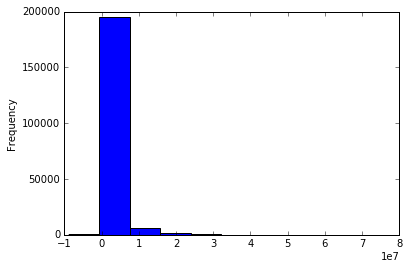

In [15]:
# Charts: Histogram for time for closing a ticket
%pylab inline
pandas_ds["time2close"].plot(kind="hist")

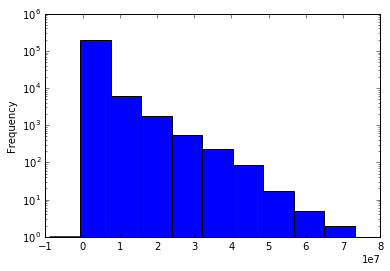

In [16]:
# Boxplots without logaritmic scale
pandas_ds["time2close"].plot(kind="hist", logy=True)

In [18]:
#filter: focus on merged tickets data
merged_tickets = pandas_ds[pandas_ds["current_status"] == 'MERGED'];
merged_tickets

,gerrit_issue,gerrit_opening_date,gerrit_closing_date,time2close,gerrit_tracker,current_status
0,1,2011-07-18 20:02:30,2011-07-18 20:02:30,0,review.openstack.org_openstack-infra/system-co...,MERGED
3,100000,2014-06-13 21:25:25,2014-07-14 10:25:12,2638787,review.openstack.org_openstack/tripleo-incubator,MERGED
4,100001,2014-06-13 21:25:52,2014-06-24 13:44:48,922736,review.openstack.org_openstack-infra/reviewstats,MERGED
5,100003,2014-06-13 21:44:02,2014-06-24 18:38:08,939246,review.openstack.org_openstack/tripleo-incubator,MERGED
6,100004,2014-06-13 21:44:06,2014-09-17 08:51:53,8248067,review.openstack.org_openstack/diskimage-builder,MERGED
7,100005,2014-06-13 21:44:23,2014-06-27 19:24:49,1201226,review.openstack.org_openstack/puppet-cinder,MERGED
13,100011,2014-06-13 22:25:59,2014-06-17 15:25:37,320378,review.openstack.org_openstack/nova,MERGED
15,100014,2014-06-13 22:27:57,2014-06-27 16:44:21,1188984,review.openstack.org_openstack/neutron,MERGED
16,100015,2014-06-13 22:58:24,2014-06-15 21:52:11,168827,review.openstack.org_openstack/sahara,MERGED
18,100017,2014-06-13 23:13:06,2014-06-15 01:57:42,96276,review.openstack.org_openstack-infra/elastic-r...,MERGED


In [80]:
#filter: the total history of commits for nova, cinder, horizon, fuel, neutron, keystone, heat, glance, tempest projects - just have to change project name in the code below
commit_nova = pandas_ds[(pandas_ds["current_status"] == 'MERGED') & (pandas_ds["gerrit_tracker"].str.contains("/nova"))];
commit_nova

,gerrit_issue,gerrit_opening_date,gerrit_closing_date,time2close,gerrit_tracker,current_status
13,100011,2014-06-13 22:25:59,2014-06-17 15:25:37,320378,review.openstack.org_openstack/nova,MERGED
19,100018,2014-06-13 23:18:00,2014-07-18 16:06:04,2998084,review.openstack.org_openstack/nova,MERGED
24,100024,2014-06-13 23:47:58,2014-06-17 01:30:18,265340,review.openstack.org_openstack/nova,MERGED
27,100028,2014-06-14 00:18:21,2014-07-03 18:14:40,1706179,review.openstack.org_openstack/nova,MERGED
66,100065,2014-06-14 18:19:28,2014-06-24 17:37:09,861461,review.openstack.org_openstack/nova,MERGED
96,100097,2014-06-15 16:56:11,2014-08-21 14:48:49,5781158,review.openstack.org_openstack/nova,MERGED
116,10012,2012-07-19 13:03:23,2012-07-19 19:19:41,22578,review.openstack.org_openstack/nova,MERGED
117,100120,2014-06-16 03:21:53,2014-06-24 12:32:54,724261,review.openstack.org_openstack/nova,MERGED
134,10014,2012-07-19 17:12:35,2012-07-20 21:25:19,101564,review.openstack.org_openstack/nova,MERGED
146,100153,2014-06-16 08:22:51,2014-06-30 14:45:08,1232537,review.openstack.org_openstack/nova,MERGED


In [21]:
#filter: focus on merged tickets data for the year 2015
merged_tickets_2015 = pandas_ds[(pandas_ds["gerrit_closing_date"] >= '2015-01-01') & (pandas_ds["gerrit_closing_date"] <= '2016-01-01') & (pandas_ds["current_status"] == 'MERGED')];
merged_tickets_2015

,gerrit_issue,gerrit_opening_date,gerrit_closing_date,time2close,gerrit_tracker,current_status
323,100381,2014-06-17 01:33:05,2015-03-11 13:48:13,23112908,review.openstack.org_openstack/trove,MERGED
937,101101,2014-06-19 08:02:49,2015-01-19 22:05:23,18540154,review.openstack.org_openstack-infra/system-co...,MERGED
1351,101580,2014-06-20 17:30:26,2015-04-06 18:11:21,25058455,review.openstack.org_openstack-infra/jenkins-j...,MERGED
1967,102274,2014-06-24 17:36:57,2015-01-30 17:57:39,19009242,review.openstack.org_openstack/horizon,MERGED
2084,102403,2014-06-25 02:48:19,2015-02-19 07:10:47,20665348,review.openstack.org_openstack/keystonemiddleware,MERGED
2099,102423,2014-06-25 06:08:21,2015-01-27 09:30:14,18674513,review.openstack.org_openstack/trove-integration,MERGED
2182,102511,2014-06-25 14:36:07,2015-01-12 23:37:10,17398863,review.openstack.org_openstack/cinder,MERGED
2211,102543,2014-06-25 16:31:31,2015-02-09 14:44:36,19779185,review.openstack.org_openstack/neutron,MERGED
2284,102631,2014-06-25 22:30:48,2015-01-15 13:30:59,17593211,review.openstack.org_openstack/nova,MERGED
2302,102649,2014-06-25 23:10:26,2015-07-10 13:43:14,32797968,review.openstack.org_openstack/nova,MERGED


In [48]:
#Statistics on about the time to close a ticket in 2015
time2close_2015 = merged_tickets_2015["time2close"]

In [49]:
#Some statistics on about the time to close a ticket in 2015
print "Mean time for closing a ticket in 2015: %f hours" % (time2close_2015.mean()/3600.0)
print "Median time for closing a ticket in 2015: %f hours" % (time2close_2015.median()/3600.0)
print "Quantiles: "
print time2close_2015.quantile([0.25, 0.5, 0.75])

Mean time for closing a ticket in 2015: 288.016682 hours
Median time for closing a ticket in 2015: 57.629444 hours
Quantiles: 
0.25     36617
0.50    207466
0.75    825466
Name: time2close, dtype: float64


In [95]:
#filter: commits for nova, cinder, horizon, fuel, neutron, keystone, heat, glance, tempest projects for the year 2015 - 2014 -2013 -2012 -2011 - just change the year and the project name in the code below
commit_nova_2015 = pandas_ds[(pandas_ds["gerrit_closing_date"] >= '2011-01-01') & (pandas_ds["gerrit_closing_date"] <= '2012-01-01') & (pandas_ds["current_status"] == 'MERGED') & (pandas_ds["gerrit_tracker"].str.contains("/tempest"))];
commit_nova_2015

,gerrit_issue,gerrit_opening_date,gerrit_closing_date,time2close,gerrit_tracker,current_status
4922,1056,2011-10-24 21:08:47,2011-10-24 21:08:47,0,review.openstack.org_openstack/tempest,MERGED
7785,1088,2011-10-25 18:56:32,2011-10-27 18:40:52,171860,review.openstack.org_openstack/tempest,MERGED
11889,1134,2011-10-28 00:53:16,2011-10-28 17:40:04,60408,review.openstack.org_openstack/tempest,MERGED
11985,1135,2011-10-28 00:53:54,2011-10-28 17:40:28,60394,review.openstack.org_openstack/tempest,MERGED
12070,1136,2011-10-28 00:55:09,2011-10-28 17:41:04,60355,review.openstack.org_openstack/tempest,MERGED
12145,1137,2011-10-27 19:24:41,2011-10-28 17:55:45,81064,review.openstack.org_openstack/tempest,MERGED
12227,1138,2011-10-27 19:26:15,2011-10-30 05:33:55,209260,review.openstack.org_openstack/tempest,MERGED
18208,1204,2011-10-30 16:33:01,2011-10-31 20:37:14,101053,review.openstack.org_openstack/tempest,MERGED
21005,1234,2011-11-01 20:51:22,2011-11-02 02:51:37,21615,review.openstack.org_openstack/tempest,MERGED
23078,1256,2011-11-02 16:44:49,2011-11-02 18:05:16,4827,review.openstack.org_openstack/tempest,MERGED


In [38]:
#filter: focus on merged tickets data for the year 2014
merged_tickets_2014 = pandas_ds[(pandas_ds["gerrit_closing_date"] >= '2014-01-01') & (pandas_ds["gerrit_closing_date"] <= '2015-01-01') & (pandas_ds["current_status"] == 'MERGED')];
merged_tickets_2014

,gerrit_issue,gerrit_opening_date,gerrit_closing_date,time2close,gerrit_tracker,current_status
3,100000,2014-06-13 21:25:25,2014-07-14 10:25:12,2638787,review.openstack.org_openstack/tripleo-incubator,MERGED
4,100001,2014-06-13 21:25:52,2014-06-24 13:44:48,922736,review.openstack.org_openstack-infra/reviewstats,MERGED
5,100003,2014-06-13 21:44:02,2014-06-24 18:38:08,939246,review.openstack.org_openstack/tripleo-incubator,MERGED
6,100004,2014-06-13 21:44:06,2014-09-17 08:51:53,8248067,review.openstack.org_openstack/diskimage-builder,MERGED
7,100005,2014-06-13 21:44:23,2014-06-27 19:24:49,1201226,review.openstack.org_openstack/puppet-cinder,MERGED
13,100011,2014-06-13 22:25:59,2014-06-17 15:25:37,320378,review.openstack.org_openstack/nova,MERGED
15,100014,2014-06-13 22:27:57,2014-06-27 16:44:21,1188984,review.openstack.org_openstack/neutron,MERGED
16,100015,2014-06-13 22:58:24,2014-06-15 21:52:11,168827,review.openstack.org_openstack/sahara,MERGED
18,100017,2014-06-13 23:13:06,2014-06-15 01:57:42,96276,review.openstack.org_openstack-infra/elastic-r...,MERGED
19,100018,2014-06-13 23:18:00,2014-07-18 16:06:04,2998084,review.openstack.org_openstack/nova,MERGED


In [50]:
#Statistics on about the time to close a ticket in 2015
time2close_2014 = merged_tickets_2014["time2close"]

In [51]:
#Some statistics on about the time to close a ticket in 2015
print "Mean time for closing a ticket in 2014: %f hours" % (time2close_2014.mean()/3600.0)
print "Median time for closing a ticket in 2014: %f hours" % (time2close_2014.median()/3600.0)
print "Quantiles: "
print time2close_2014.quantile([0.25, 0.5, 0.75])

Mean time for closing a ticket in 2014: 302.928327 hours
Median time for closing a ticket in 2014: 78.192778 hours
Quantiles: 
0.25      50418.0
0.50     281494.0
0.75    1085611.5
Name: time2close, dtype: float64


In [39]:
#filter: focus on merged tickets data for the year 2013
merged_tickets_2013 = pandas_ds[(pandas_ds["gerrit_closing_date"] >= '2013-01-01') & (pandas_ds["gerrit_closing_date"] <= '2014-01-01') & (pandas_ds["current_status"] == 'MERGED')];
merged_tickets_2013

,gerrit_issue,gerrit_opening_date,gerrit_closing_date,time2close,gerrit_tracker,current_status
3689,10419,2012-07-27 19:37:22,2013-05-20 21:47:34,25668612,review.openstack.org_openstack/nova,MERGED
7308,10826,2012-08-04 07:02:13,2013-01-09 00:21:21,13627148,review.openstack.org_openstack/nova,MERGED
12124,11366,2012-08-14 22:01:16,2013-01-08 18:08:17,12686821,review.openstack.org_openstack/nova,MERGED
13811,11556,2012-08-17 17:54:29,2013-04-04 22:19:14,19887885,review.openstack.org_openstack/nova,MERGED
22714,12521,2012-09-06 22:10:30,2013-01-16 06:50:51,11349621,review.openstack.org_openstack/cinder,MERGED
24256,12694,2012-09-10 14:16:06,2013-01-22 11:44:16,11568490,review.openstack.org_openstack/nova,MERGED
24438,12716,2012-09-10 17:44:26,2013-02-22 22:48:19,14274233,review.openstack.org_openstack-infra/gerrit,MERGED
36697,14132,2012-10-06 21:15:47,2013-01-09 09:58:35,8167368,review.openstack.org_openstack/cinder,MERGED
42619,14804,2012-10-25 03:06:51,2013-02-06 15:36:48,9030597,review.openstack.org_openstack/oslo-incubator,MERGED
43419,14893,2012-10-26 18:01:01,2013-07-19 23:12:49,23001108,review.openstack.org_openstack-infra/jenkins-j...,MERGED


In [40]:
#Statistics on about the time to close a ticket in 2013
time2close_2013 = merged_tickets_2013["time2close"]

In [41]:
#Some statistics on about the time to close a ticket in 2013
print "Mean time for closing a ticket in 2013: %f hours" % (time2close_2013.mean()/3600.0)
print "Median time for closing a ticket in 2013: %f hours" % (time2close_2013.median()/3600.0)
print "Quantiles: "
print time2close_2013.quantile([0.25, 0.5, 0.75])

Mean time for closing a ticket in 2013: 153.573614 hours
Median time for closing a ticket in 2013: 36.649167 hours
Quantiles: 
0.25     17924
0.50    131937
0.75    554409
Name: time2close, dtype: float64


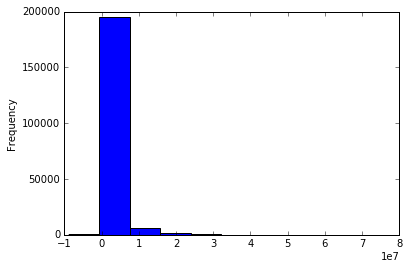

In [43]:
# Chart: Histogram for time for closing a ticket in 2013
pandas_ds["time2close"].plot(kind="hist")

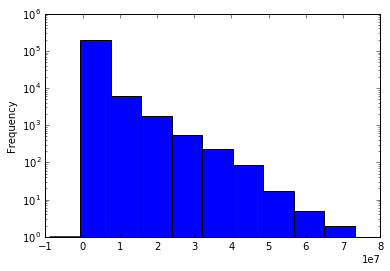

In [44]:
# Boxplots without logaritmic scale: time to close a tickets in 2013
pandas_ds["time2close"].plot(kind="hist", logy=True)

In [45]:
#filter: focus on merged tickets data for the year 2012
merged_tickets_2012 = pandas_ds[(pandas_ds["gerrit_closing_date"] >= '2012-01-01') & (pandas_ds["gerrit_closing_date"] <= '2013-01-01') & (pandas_ds["current_status"] == 'MERGED')];
merged_tickets_2012

,gerrit_issue,gerrit_opening_date,gerrit_closing_date,time2close,gerrit_tracker,current_status
20,10002,2012-07-19 05:27:16,2012-07-25 17:09:27,560531,review.openstack.org_openstack-infra/zuul,MERGED
39,10004,2012-07-19 07:07:39,2012-07-19 10:37:45,12606,review.openstack.org_openstack/heat,MERGED
49,10005,2012-07-19 07:07:36,2012-07-19 13:16:22,22126,review.openstack.org_openstack/heat,MERGED
60,10006,2012-07-19 10:08:09,2012-07-19 18:50:23,31334,review.openstack.org_openstack/keystone,MERGED
77,10008,2012-07-19 10:31:36,2012-07-23 20:11:17,380381,review.openstack.org_openstack-infra/zuul,MERGED
88,10009,2012-07-19 12:01:11,2012-07-19 19:18:23,26232,review.openstack.org_openstack/keystone,MERGED
100,10010,2012-07-19 12:14:48,2012-07-21 00:29:16,130468,review.openstack.org_openstack/horizon,MERGED
109,10011,2012-07-19 12:21:03,2012-07-19 19:09:16,24493,review.openstack.org_openstack/neutron,MERGED
116,10012,2012-07-19 13:03:23,2012-07-19 19:19:41,22578,review.openstack.org_openstack/nova,MERGED
125,10013,2012-07-19 14:56:07,2012-07-21 16:37:19,178872,review.openstack.org_openstack/neutron,MERGED


In [55]:
#Statistics on about the time to close a ticket in 2012
time2close_2012 = merged_tickets_2012["time2close"]

In [59]:
#Some statistics on about the time to close a ticket in 2012
print "Mean time for closing a ticket in 2012: %f hours" % (time2close_2012.mean()/3600.0)
print "Median time for closing a ticket in 2012: %f hours" % (time2close_2012.median()/3600.0)
print "Quantiles: "
print time2close_2012.quantile([0.25, 0.5, 0.75])

Mean time for closing a ticket in 2012: nan hours
Median time for closing a ticket in 2012: nan hours
Quantiles: 
nan


note - response NAN hours because we have some 0 values. Have to rewrite the datas so that time2close is not expressed in hours but in minutes...

In [46]:
#filter: focus on merged tickets data for the year 2011
merged_tickets_2012 = pandas_ds[(pandas_ds["gerrit_closing_date"] >= '2011-01-01') & (pandas_ds["gerrit_closing_date"] <= '2012-01-01') & (pandas_ds["current_status"] == 'MERGED')];
merged_tickets_2012

,gerrit_issue,gerrit_opening_date,gerrit_closing_date,time2close,gerrit_tracker,current_status
0,1,2011-07-18 20:02:30,2011-07-18 20:02:30,0,review.openstack.org_openstack-infra/system-co...,MERGED
182,1002,2011-10-20 22:16:33,2011-10-21 18:13:55,71842,review.openstack.org_openstack/nova,MERGED
257,1003,2011-10-20 21:55:47,2011-10-20 21:55:47,0,review.openstack.org_openstack/openstack-manuals,MERGED
338,1004,2011-10-21 01:02:14,2011-10-28 00:35:54,603220,review.openstack.org_openstack/swift,MERGED
429,1005,2011-10-20 22:14:22,2011-10-20 22:14:22,0,review.openstack.org_openstack/keystone,MERGED
501,1006,2011-10-21 16:21:08,2011-10-21 16:21:08,0,review.openstack.org_openstack-infra/git-review,MERGED
582,1007,2011-10-20 22:42:04,2011-10-20 22:42:04,0,review.openstack.org_openstack-infra/system-co...,MERGED
667,1008,2011-10-20 22:54:11,2011-10-20 22:54:11,0,review.openstack.org_openstack/keystone,MERGED
845,101,2011-07-27 19:59:06,2011-07-27 19:59:06,0,review.openstack.org_openstack-infra/system-co...,MERGED
846,1010,2011-10-21 00:41:56,2011-10-21 22:58:23,80187,review.openstack.org_openstack/nova,MERGED


In [47]:
#filter: focus on merged tickets data for the year 2010
merged_tickets_2012 = pandas_ds[(pandas_ds["gerrit_closing_date"] >= '2010-01-01') & (pandas_ds["gerrit_closing_date"] <= '2011-01-01') & (pandas_ds["current_status"] == 'MERGED')];
merged_tickets_2012

,gerrit_issue,gerrit_opening_date,gerrit_closing_date,time2close,gerrit_tracker,current_status


Some more metrics ...